In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from scaler import LogScaler
import UNET
from sklearn.metrics import r2_score
from model import Unet
from torchmetrics import R2Score
import seaborn as sns

def mape(pred, target):
    return ((pred-target).abs() / target).mean()

mse = nn.MSELoss()

/work/data/sony/1215/model/UNET
(1500, 3, 101, 201)
(1500, 2)
(1500, 1, 101, 201)


### best_params={"lr": 0.001, "batch_size": 8}

In [2]:
config = {"lr": 0.001, "batch_size": 16, "criterion": mse}
UNET.tuning(config, 1000)

1 train_loss:  0.11149057932198048 val_loss:  0.016668339156442218 val_score:  0.09187865257263184
2 train_loss:  0.01419797503699859 val_loss:  0.010849854288001856 val_score:  0.4096083641052246
3 train_loss:  0.010044495097051064 val_loss:  0.008161264213009013 val_score:  0.5564788579940796
4 train_loss:  0.008171740292261044 val_loss:  0.006632641061312622 val_score:  0.6396300792694092
5 train_loss:  0.006988294692710042 val_loss:  0.006002832152363326 val_score:  0.6751053333282471
6 train_loss:  0.006298068193718791 val_loss:  0.005766556624116169 val_score:  0.6881378889083862
7 train_loss:  0.006497158625473579 val_loss:  0.006615220827774869 val_score:  0.6422464847564697
8 train_loss:  0.006149923282985886 val_loss:  0.0057409709681653315 val_score:  0.6898820400238037
9 train_loss:  0.006057239584624768 val_loss:  0.005606184920503033 val_score:  0.6972677707672119
10 train_loss:  0.006563584522033731 val_loss:  0.005754522306637632 val_score:  0.6888760328292847
11 train_

0.9981933236122131

In [2]:
#保存モデル読み込み
model = Unet()
model.load_state_dict(torch.load("0.998.pth"))

<All keys matched successfully>

In [3]:
gpu = torch.device("cuda") #gpuデバイスオブジェクト作成
cpu = torch.device("cpu") #cpuデバイスオブジェクト作成

In [4]:
#r2スコア算出
test_pred = UNET.scaler_out.inverse(model(UNET.twoD_x_test_tensor_scaled, UNET.oneD_x_test_tensor_scaled))
val_pred = UNET.scaler_out.inverse(model(UNET.twoD_x_val_tensor_scaled, UNET.oneD_x_val_tensor_scaled))
# train_pred = UNET.scaler_out.inverse(model(UNET.twoD_x_train_tensor_scaled, UNET.oneD_x_train_tensor_scaled))

r2score = R2Score()
# print(r2score(preds=train_pred.flatten(), target=UNET.y_train_tensor.flatten()))
print(r2score(preds=val_pred.flatten(), target=UNET.y_val_tensor.flatten()))
print(r2score(preds=test_pred.flatten(), target=UNET.y_test_tensor.flatten()))

tensor(0.9982, grad_fn=<MeanBackward0>)
tensor(0.9987, grad_fn=<MeanBackward0>)


#### log　yyplot

Text(0, 0.5, 'ML')

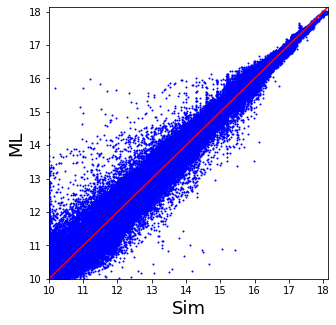

In [5]:
#yyplot作成
plt.figure(figsize=(5, 5))
numpy_val_truth=UNET.y_test
numpy_val_pred=test_pred.detach().numpy()
plt.scatter(numpy_val_truth.flatten(), numpy_val_pred.flatten(), s=1, c="b")

# plt.scatter(numpy_val_truth[:, :, :, 0].flatten(), numpy_val_pred[:, :, :, 0].flatten(), s=1, c="y")
# plt.scatter(numpy_val_truth[:, :, :, -1].flatten(), numpy_val_pred[:, :, :, -1].flatten(), s=1, c="y")

line = np.linspace(numpy_val_truth.min(), numpy_val_truth.max(), 100)

#対角線の作成
plt.plot(line,line,color="r")
plt.xlim(numpy_val_truth.min(), numpy_val_truth.max())
plt.ylim(numpy_val_truth.min(), numpy_val_truth.max())
plt.xlabel("Sim", fontsize=18)
plt.ylabel("ML", fontsize=18)

#### 元スケール yyplot&r2socre

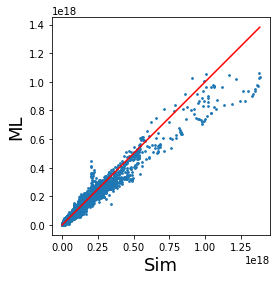

0.9890208540018943


In [14]:
scaler_ml = LogScaler()
scaler_sim = LogScaler()
scaler_ml.inverse(numpy_val_pred)
scaler_sim.inverse(numpy_val_truth)

plt.scatter(scaler_sim.former_data.flatten(), scaler_ml.former_data.flatten(), s=3)

line = np.linspace(scaler_sim.former_data.min(), scaler_sim.former_data.max(), 100)

#対角線の作成
plt.plot(line,line,color="r")
plt.xlim(scaler_sim.former_data.min(), scaler_sim.former_data.max())
plt.ylim(scaler_sim.former_data.min(), scaler_sim.former_data.max())
plt.axis("square")
plt.xlabel("Sim", fontsize=18)
plt.ylabel("ML", fontsize=18)
plt.show()

print(r2_score(y_pred=scaler_ml.former_data[:, :, :, 1:-1].flatten(), y_true=scaler_sim.former_data[:, :, :, 1:-1].flatten()))

0
temperature:753.0℃, time:3107.0s
r2:0.998491


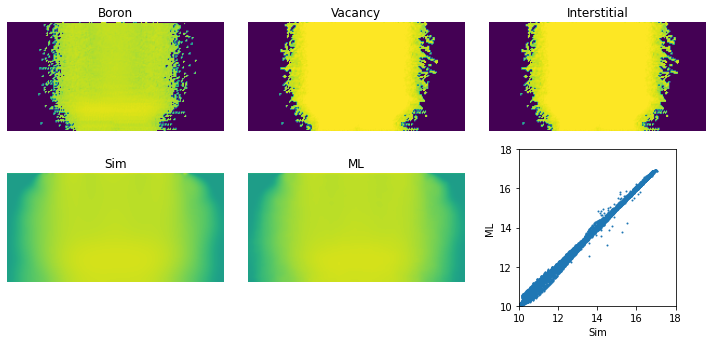

1
temperature:1148.0℃, time:3467.0s
r2:0.996936


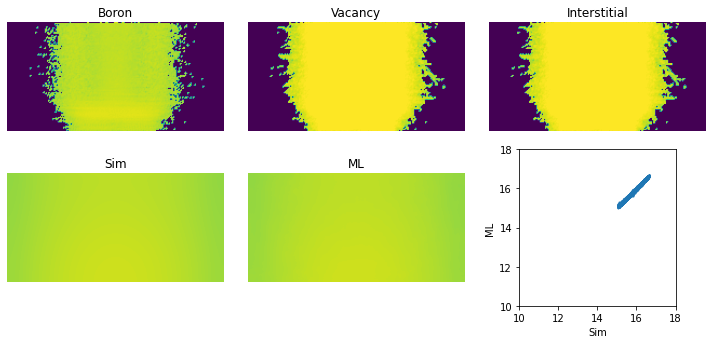

2
temperature:1006.0℃, time:2714.0s
r2:0.999486


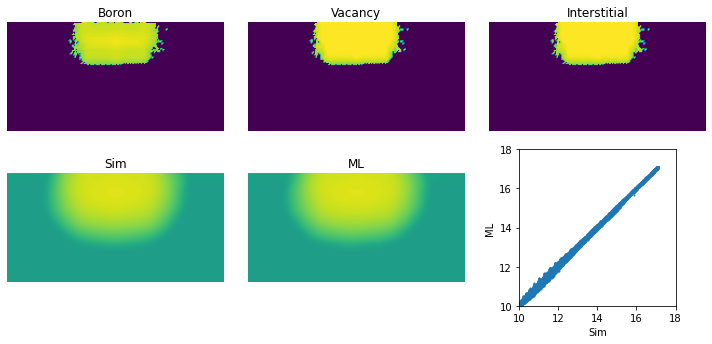

3
temperature:1131.0℃, time:1311.0s
r2:0.998122


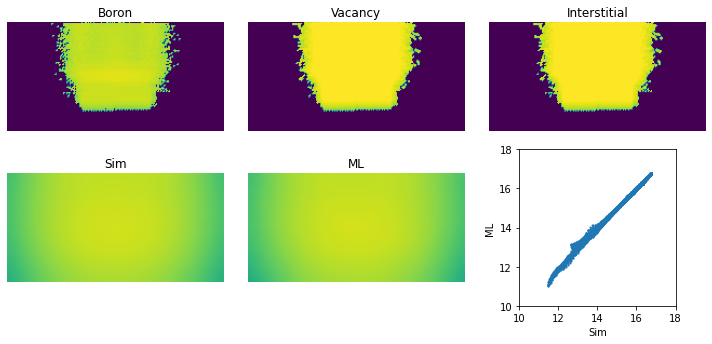

4
temperature:944.0℃, time:2631.0s
r2:0.999320


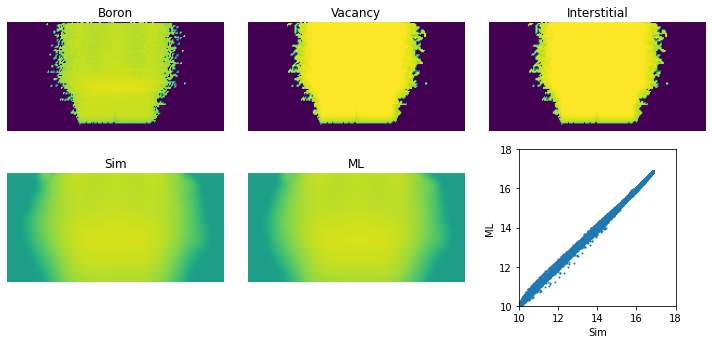

5
temperature:725.0℃, time:3520.0s
r2:0.991067


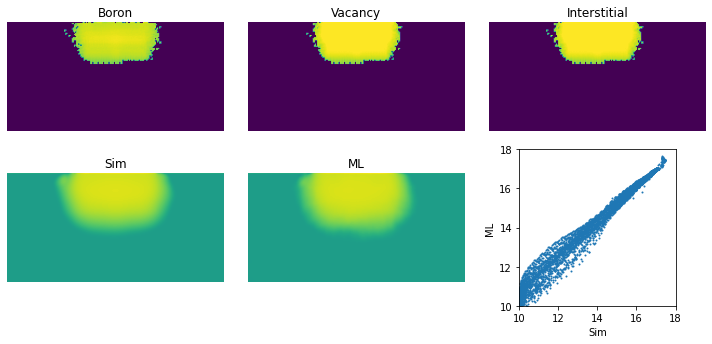

6
temperature:1096.0℃, time:3119.0s
r2:0.997862


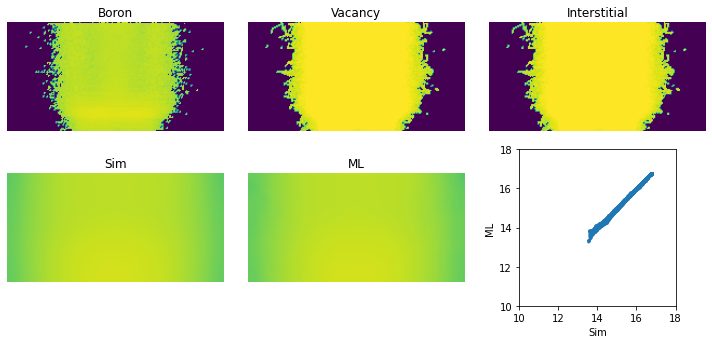

7
temperature:830.0℃, time:4552.0s
r2:0.997855


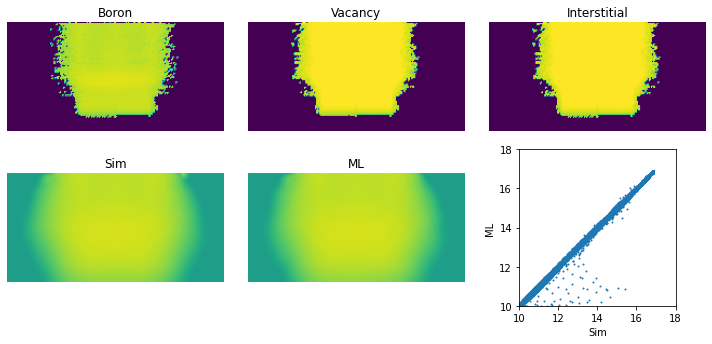

8
temperature:1113.0℃, time:7130.0s
r2:0.995825


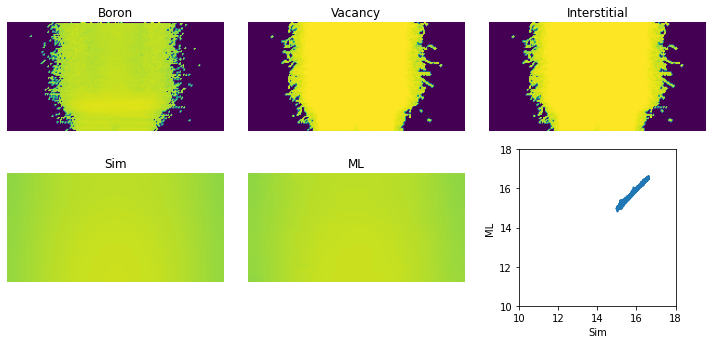

9
temperature:1152.0℃, time:1259.0s
r2:0.995219


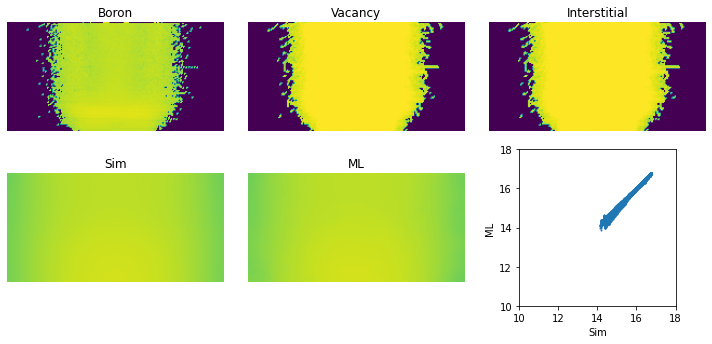

10
temperature:1093.0℃, time:7619.0s
r2:0.995524


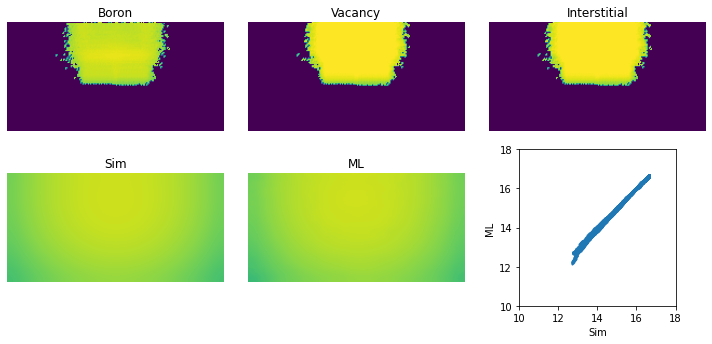

11
temperature:1174.0℃, time:8495.0s
r2:0.955046


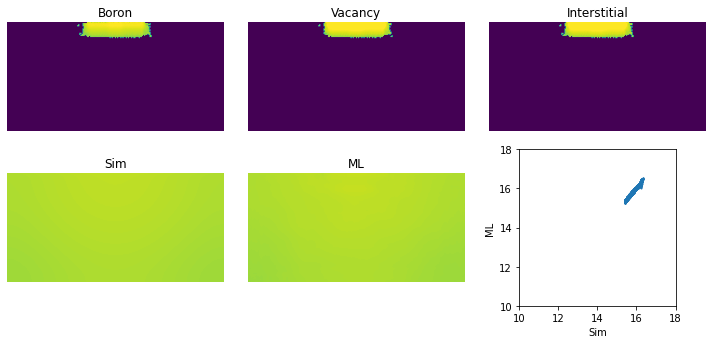

12
temperature:1014.0℃, time:10279.0s
r2:0.997454


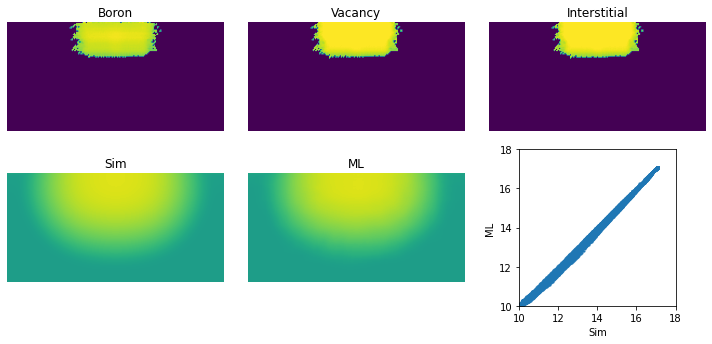

13
temperature:894.0℃, time:114.0s
r2:0.999659


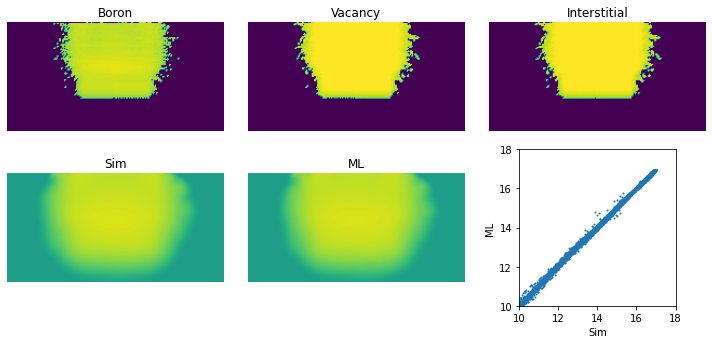

14
temperature:1002.0℃, time:1596.0s
r2:0.998431


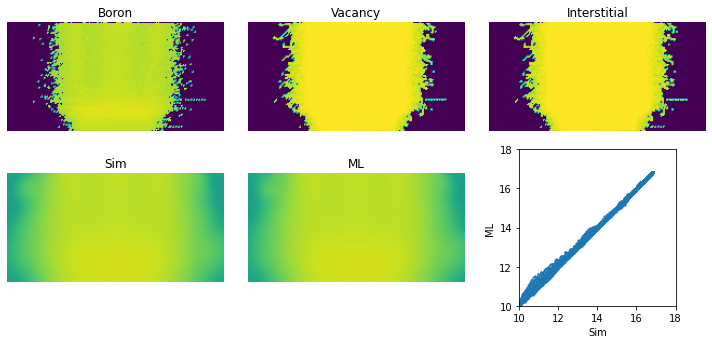

15
temperature:738.0℃, time:74.0s
r2:0.989783


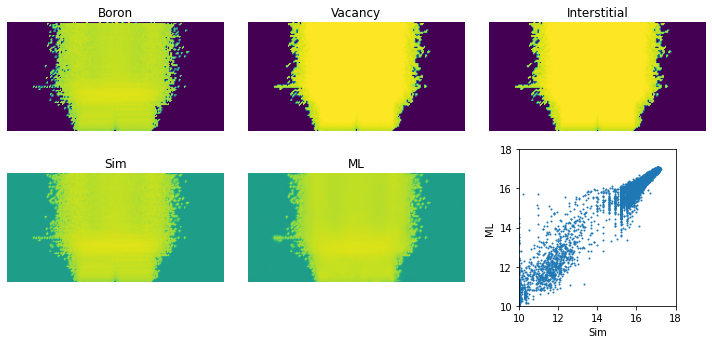

16
temperature:1048.0℃, time:7254.0s
r2:0.998626


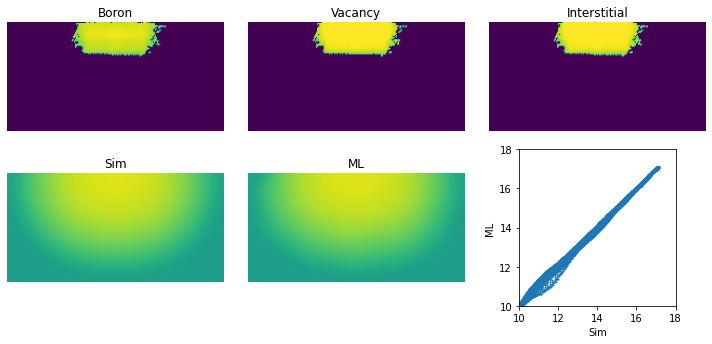

17
temperature:1055.0℃, time:9886.0s
r2:0.997830


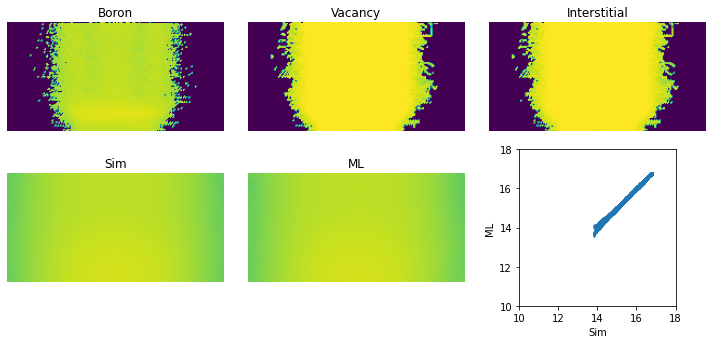

18
temperature:1000.0℃, time:2571.0s
r2:0.999749


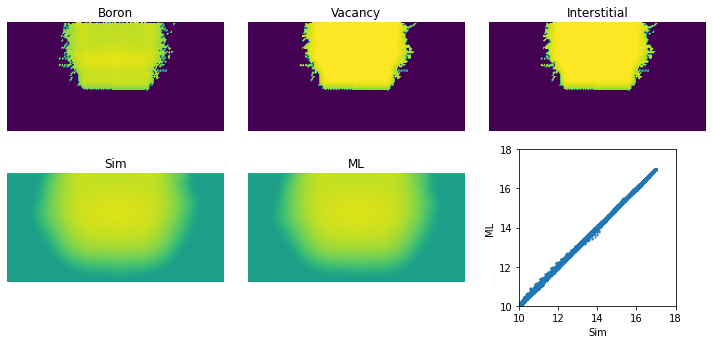

19
temperature:1043.0℃, time:10027.0s
r2:0.996584


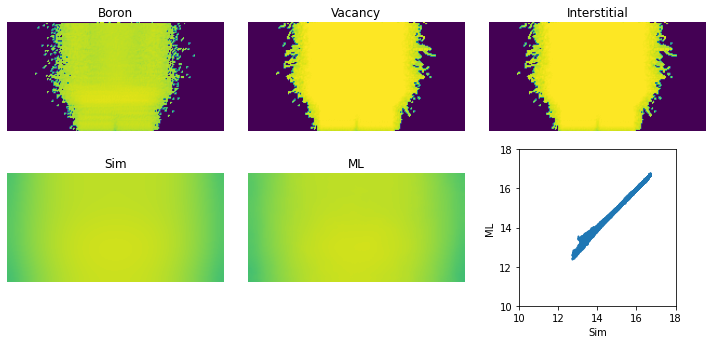

20
temperature:1052.0℃, time:8450.0s
r2:0.998243


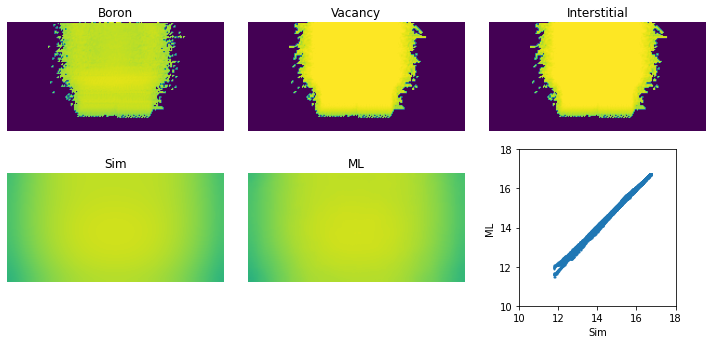

21
temperature:833.0℃, time:5703.0s
r2:0.997898


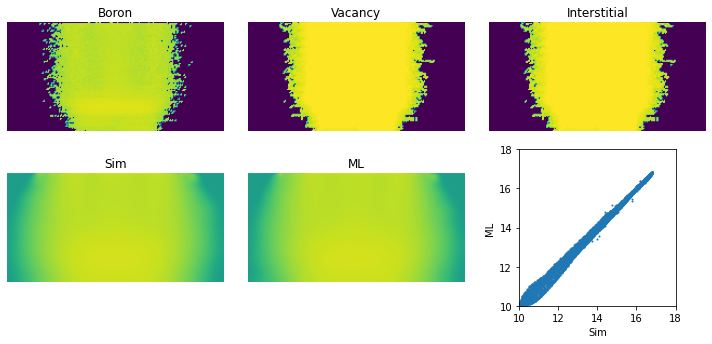

22
temperature:1067.0℃, time:5378.0s
r2:0.996865


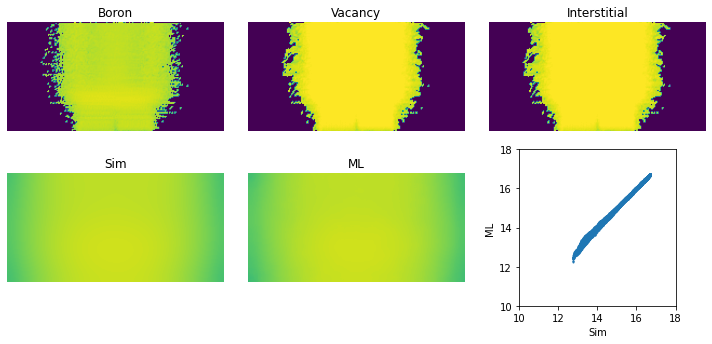

23
temperature:727.0℃, time:3722.0s
r2:0.998638


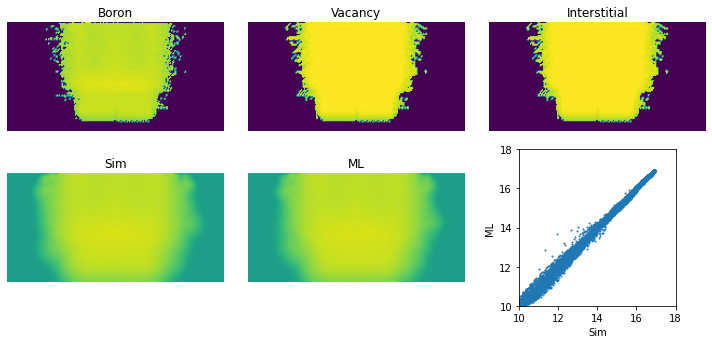

24
temperature:897.0℃, time:1346.0s
r2:0.999317


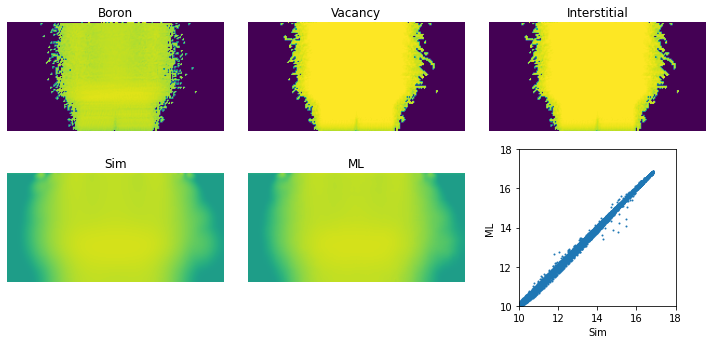

25
temperature:1044.0℃, time:7733.0s
r2:0.998909


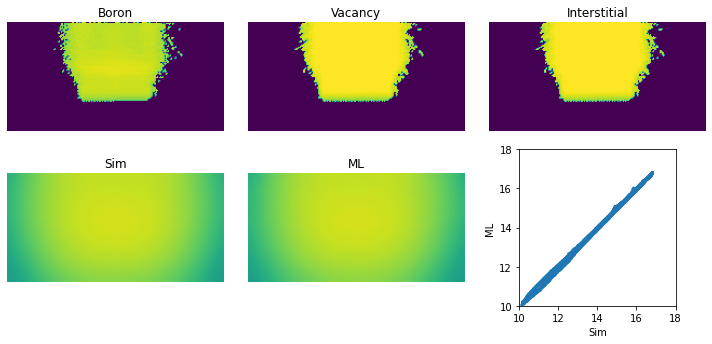

26
temperature:872.0℃, time:3316.0s
r2:0.998242


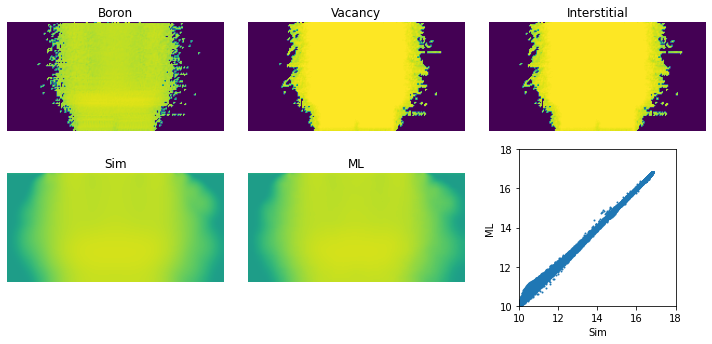

27
temperature:758.0℃, time:7896.0s
r2:0.994634


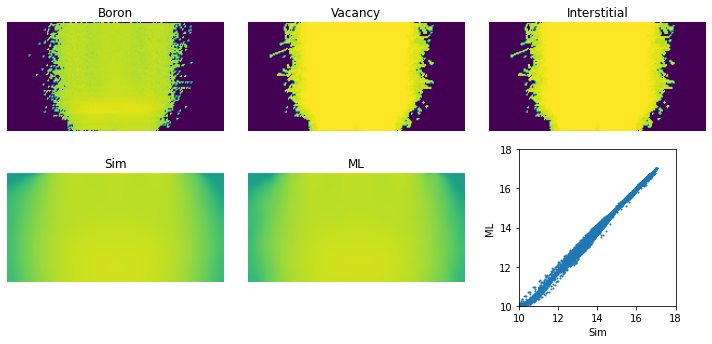

28
temperature:924.0℃, time:2063.0s
r2:0.999163


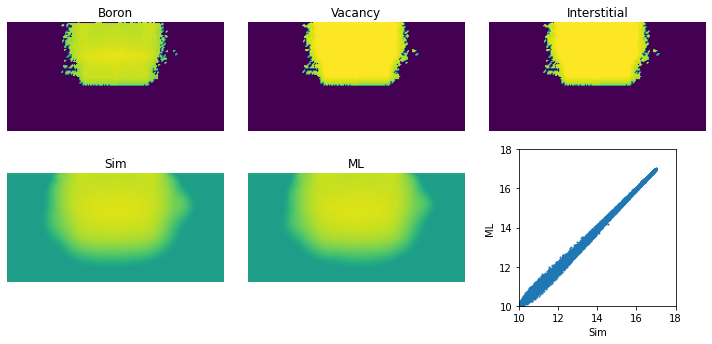

29
temperature:1022.0℃, time:7113.0s
r2:0.999026


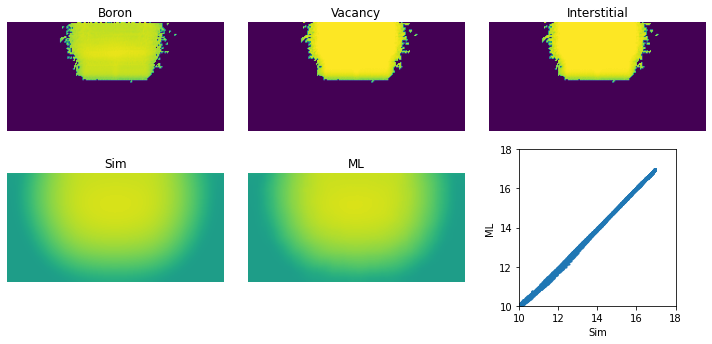

30
temperature:986.0℃, time:9677.0s
r2:0.999625


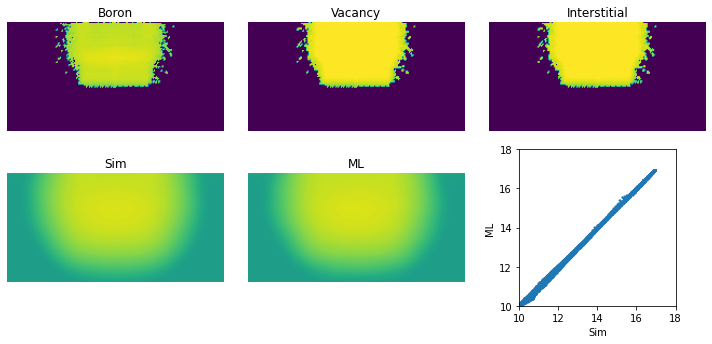

31
temperature:943.0℃, time:7524.0s
r2:0.999396


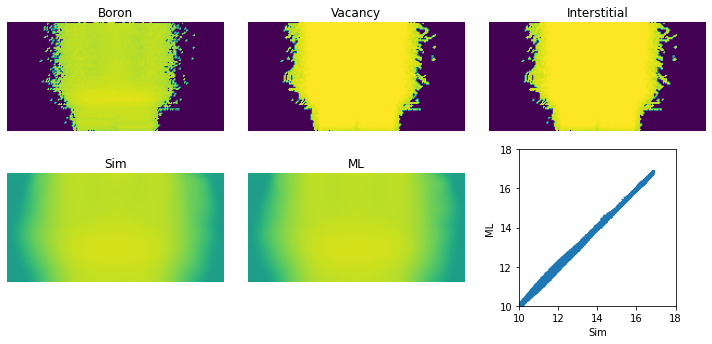

32
temperature:874.0℃, time:8412.0s
r2:0.999468


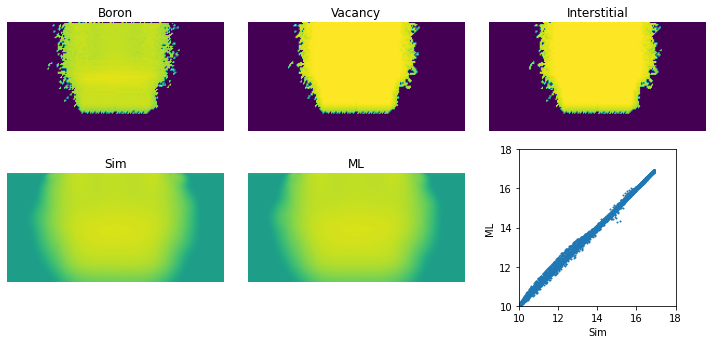

33
temperature:1121.0℃, time:3141.0s
r2:0.998074


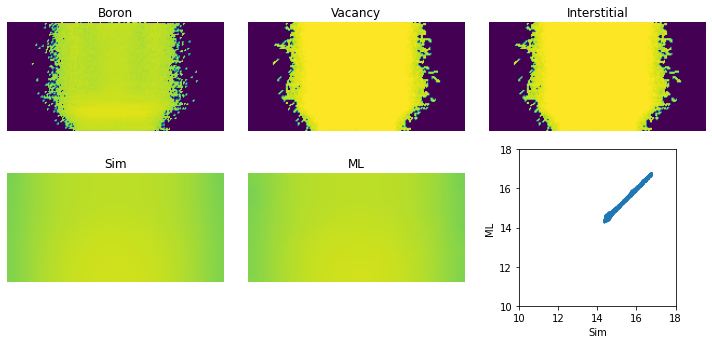

34
temperature:1054.0℃, time:4847.0s
r2:0.999040


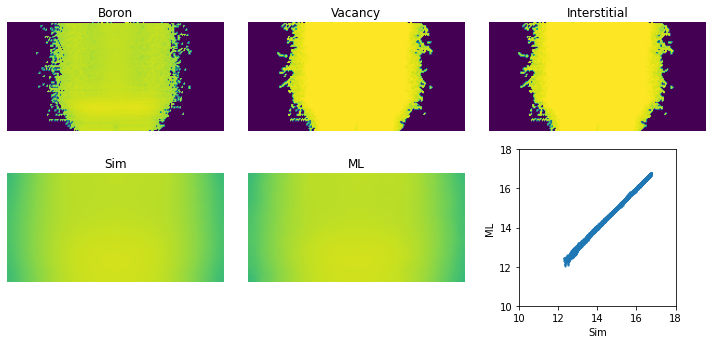

35
temperature:721.0℃, time:1295.0s
r2:0.986079


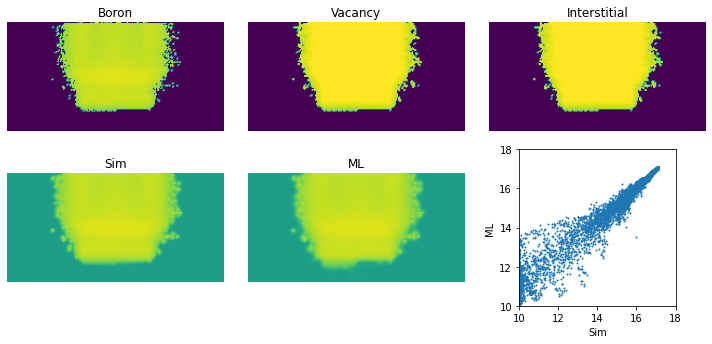

36
temperature:944.0℃, time:9448.0s
r2:0.999030


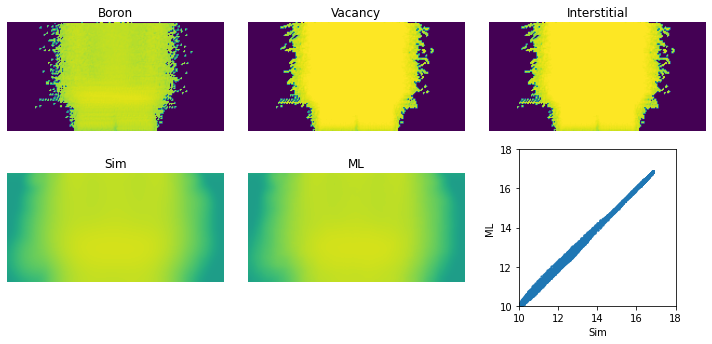

37
temperature:931.0℃, time:10418.0s
r2:0.999635


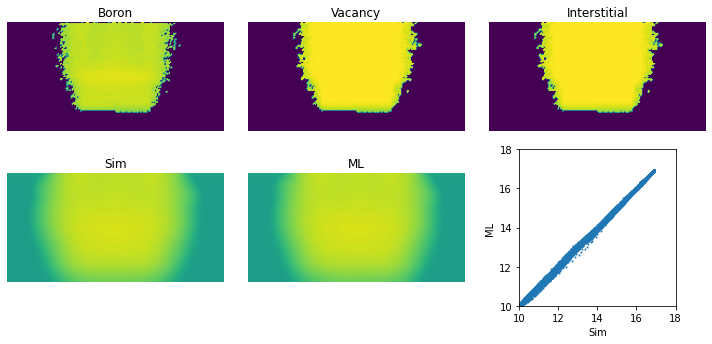

38
temperature:969.0℃, time:7565.0s
r2:0.999336


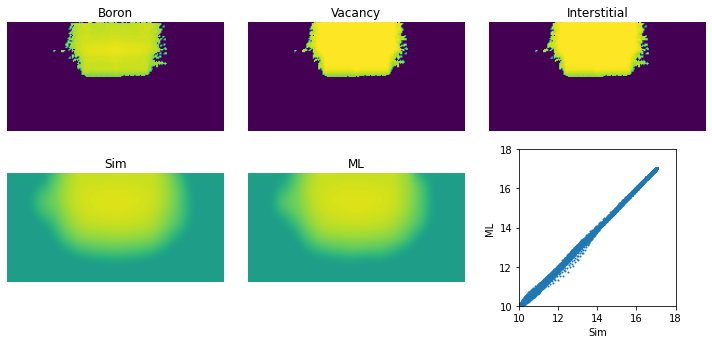

39
temperature:800.0℃, time:2958.0s
r2:0.996336


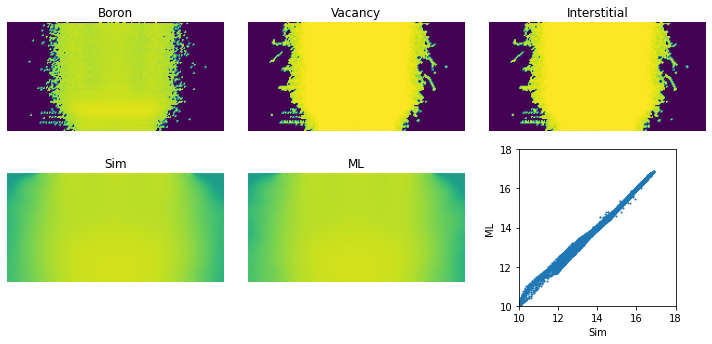

40
temperature:1068.0℃, time:2060.0s
r2:0.995652


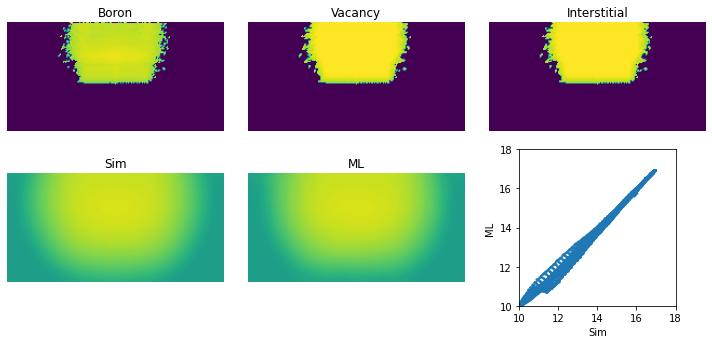

41
temperature:964.0℃, time:6653.0s
r2:0.999324


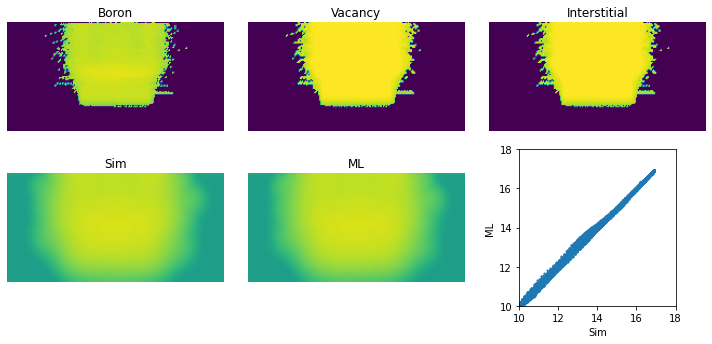

42
temperature:888.0℃, time:8726.0s
r2:0.999677


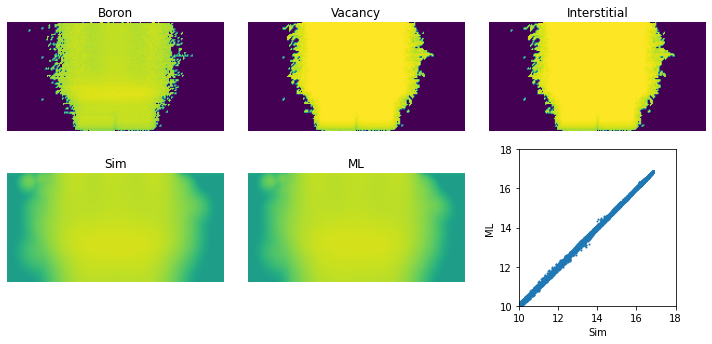

43
temperature:739.0℃, time:10629.0s
r2:0.995735


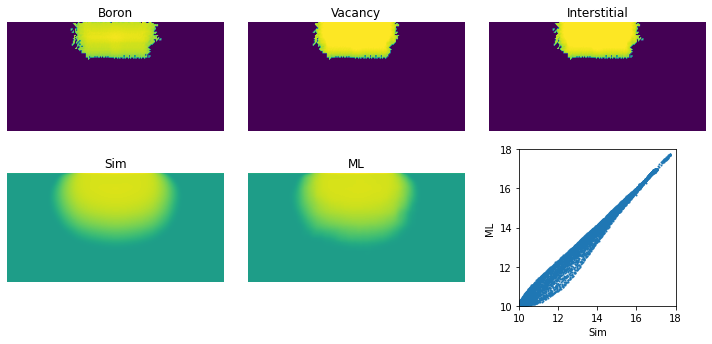

44
temperature:1168.0℃, time:4477.0s
r2:0.997311


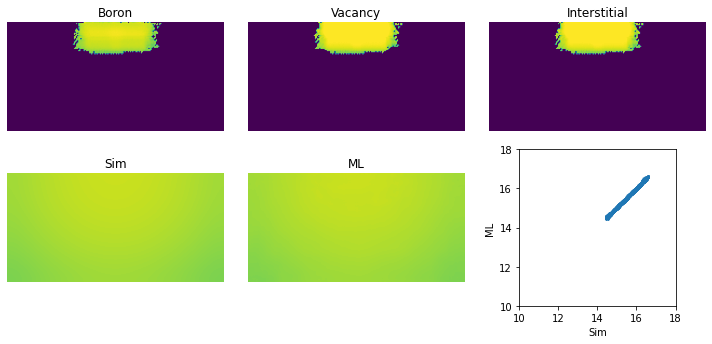

45
temperature:1122.0℃, time:10506.0s
r2:0.995578


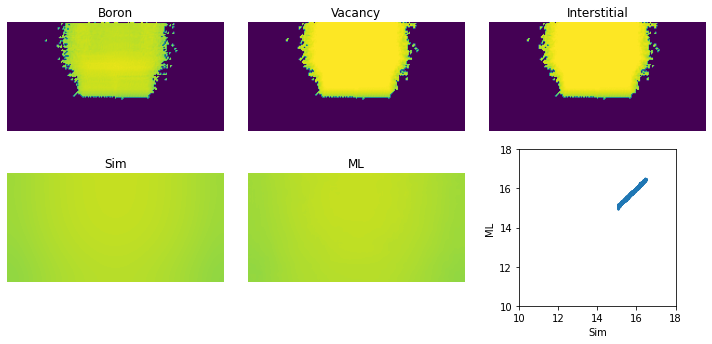

46
temperature:1105.0℃, time:2508.0s
r2:0.994514


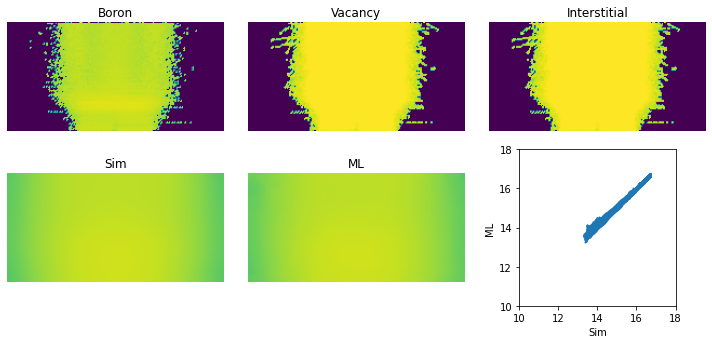

47
temperature:865.0℃, time:10107.0s
r2:0.999704


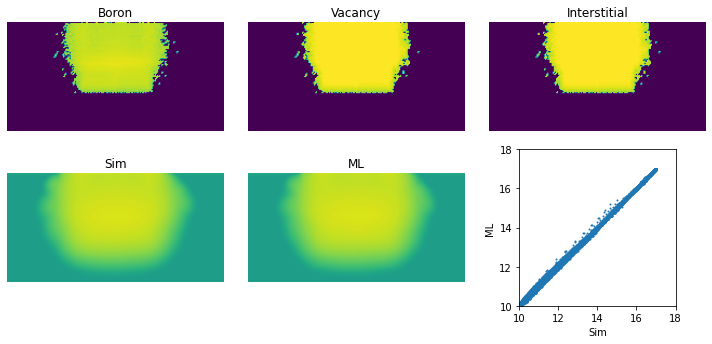

48
temperature:878.0℃, time:10252.0s
r2:0.999312


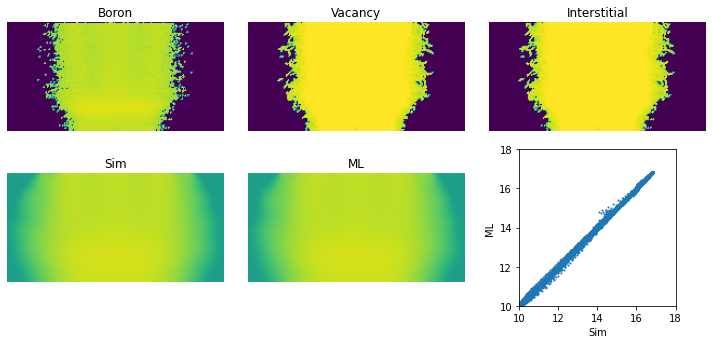

49
temperature:1127.0℃, time:10319.0s
r2:0.995550


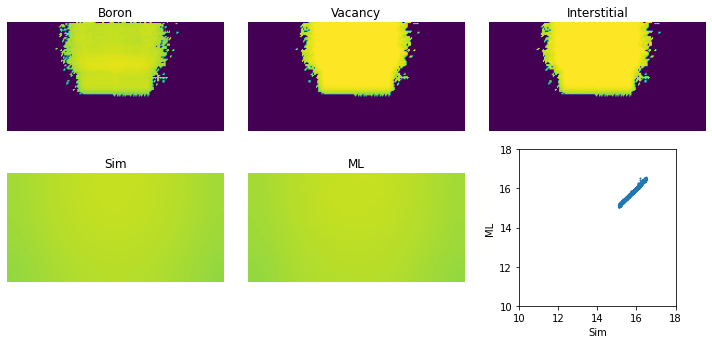

50
temperature:929.0℃, time:4669.0s
r2:0.999375


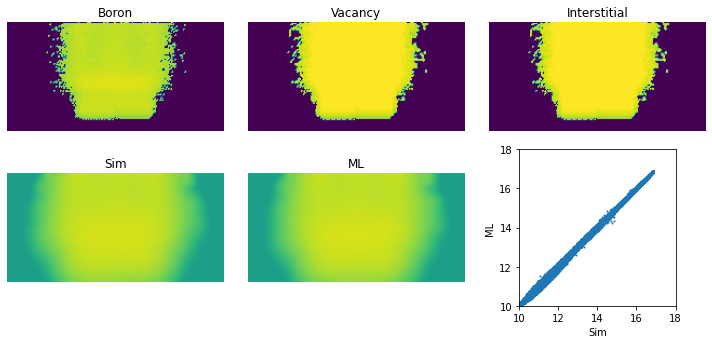

51
temperature:917.0℃, time:4030.0s
r2:0.999749


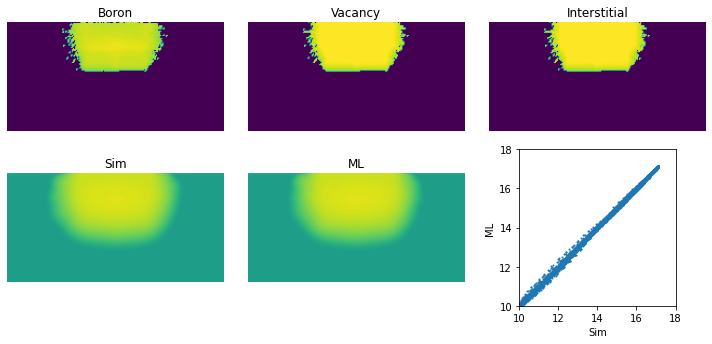

52
temperature:857.0℃, time:7365.0s
r2:0.998776


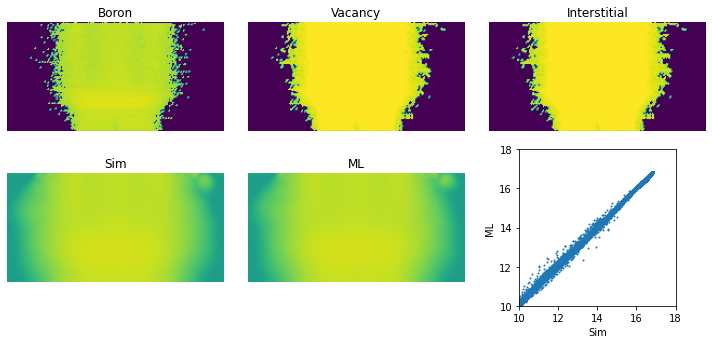

53
temperature:1071.0℃, time:4883.0s
r2:0.997989


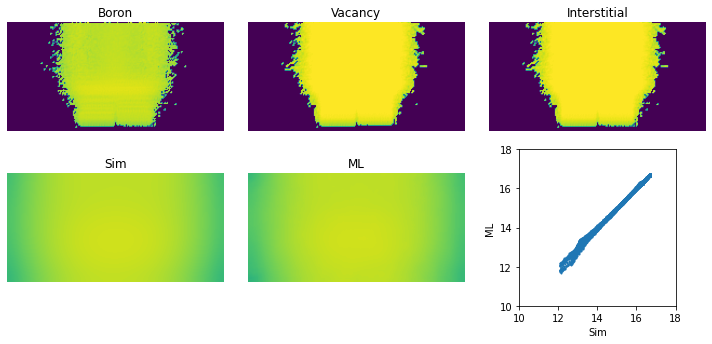

54
temperature:1083.0℃, time:4896.0s
r2:0.996610


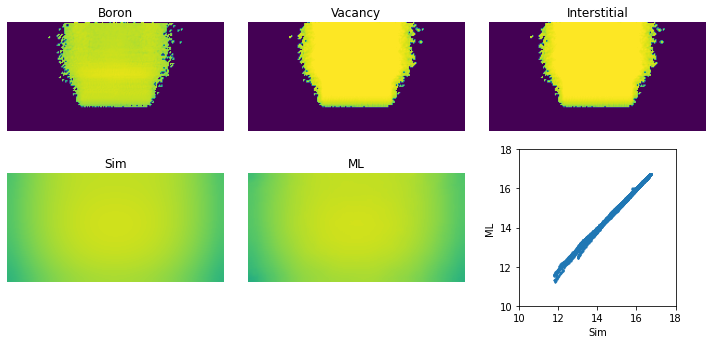

55
temperature:926.0℃, time:3932.0s
r2:0.999520


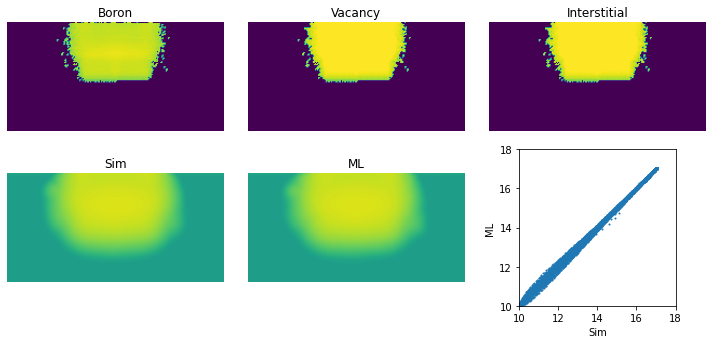

56
temperature:1034.0℃, time:488.0s
r2:0.999622


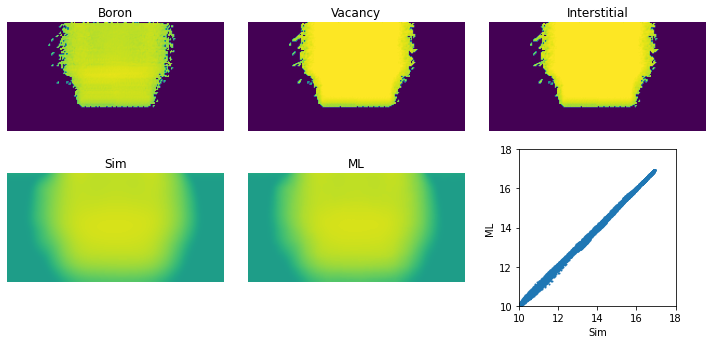

57
temperature:830.0℃, time:76.0s
r2:0.993035


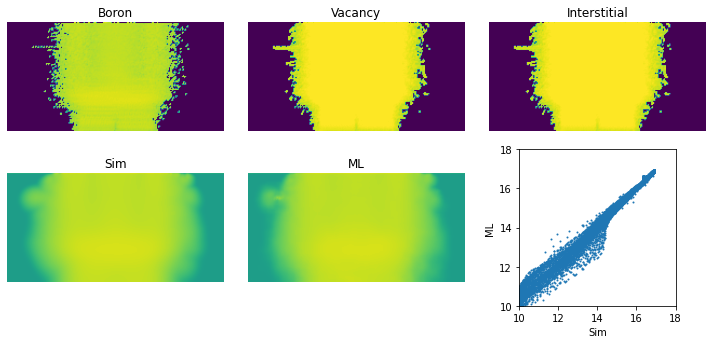

58
temperature:956.0℃, time:6967.0s
r2:0.999304


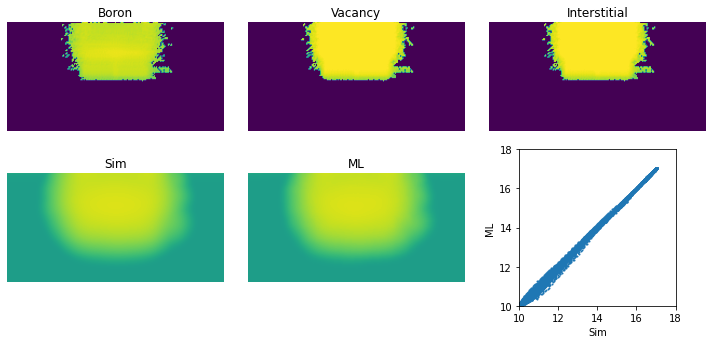

59
temperature:993.0℃, time:10171.0s
r2:0.998394


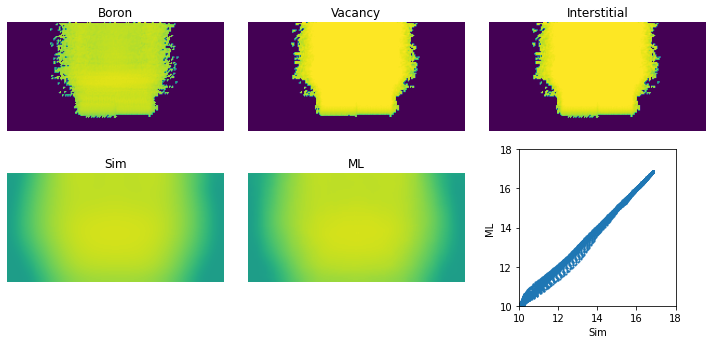

60
temperature:1106.0℃, time:6156.0s
r2:0.998394


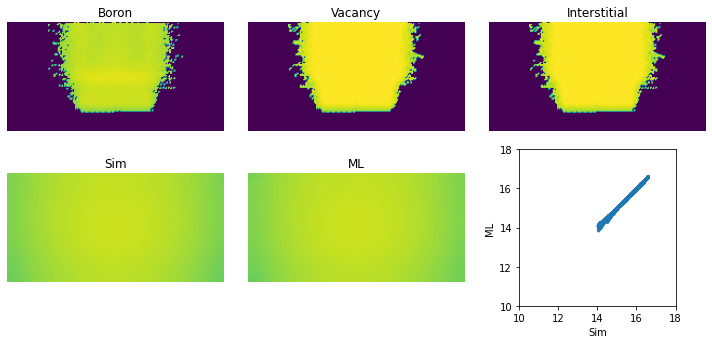

61
temperature:1152.0℃, time:1684.0s
r2:0.996299


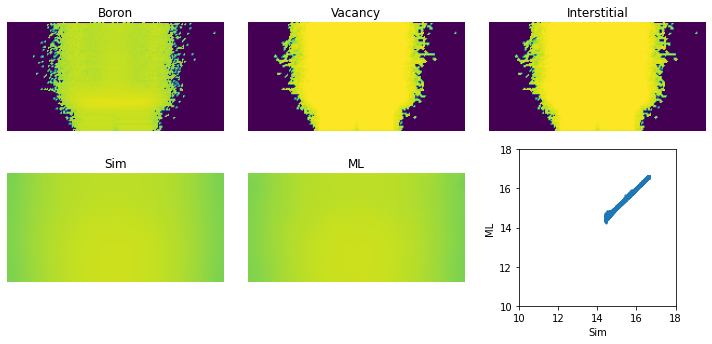

62
temperature:1192.0℃, time:4016.0s
r2:0.987374


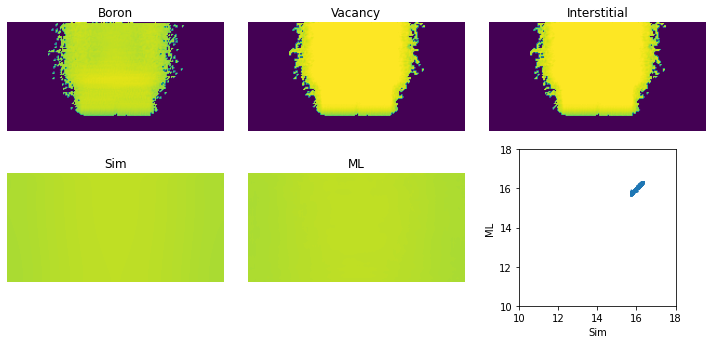

63
temperature:999.0℃, time:3577.0s
r2:0.999518


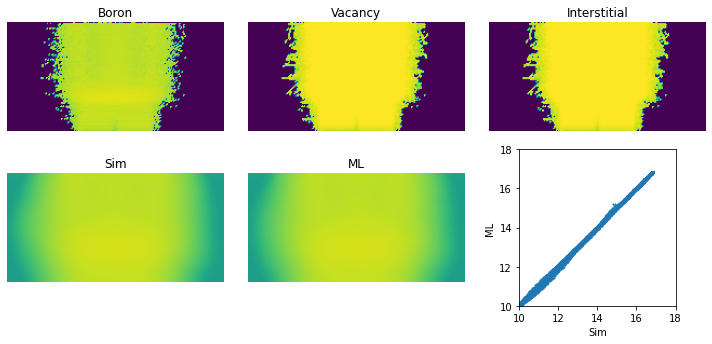

64
temperature:746.0℃, time:10319.0s
r2:0.998586


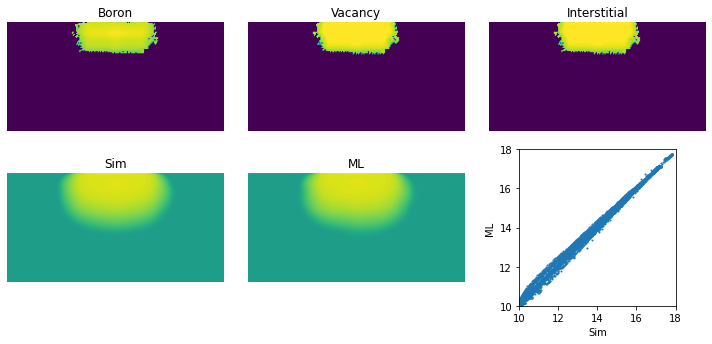

65
temperature:949.0℃, time:10432.0s
r2:0.999570


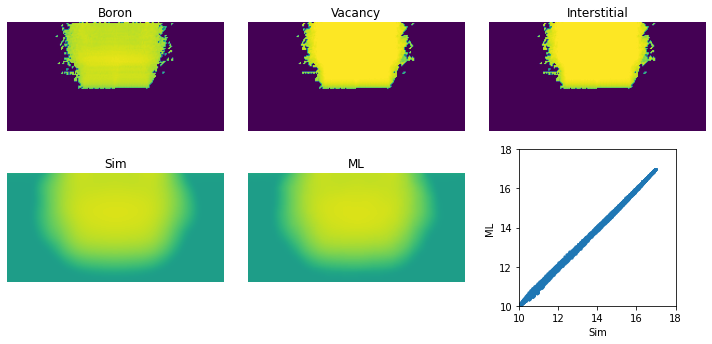

66
temperature:868.0℃, time:1637.0s
r2:0.998728


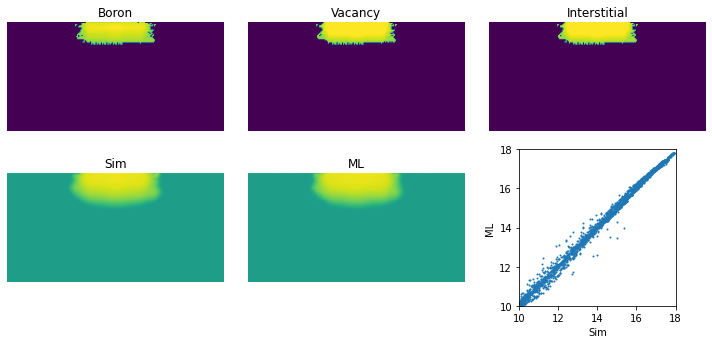

67
temperature:1087.0℃, time:3603.0s
r2:0.999192


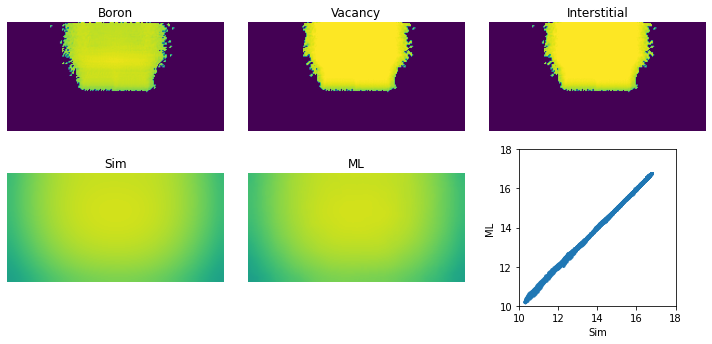

68
temperature:783.0℃, time:3850.0s
r2:0.998245


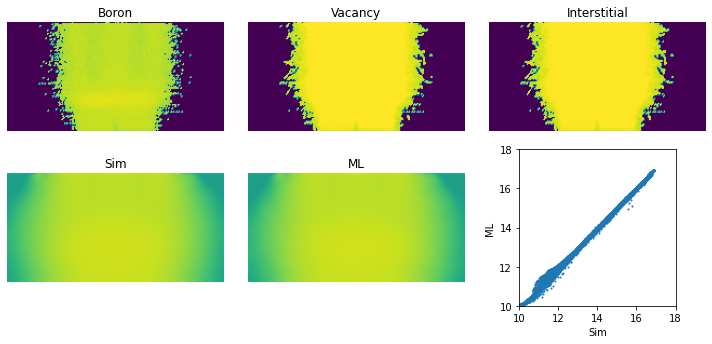

69
temperature:938.0℃, time:7575.0s
r2:0.999603


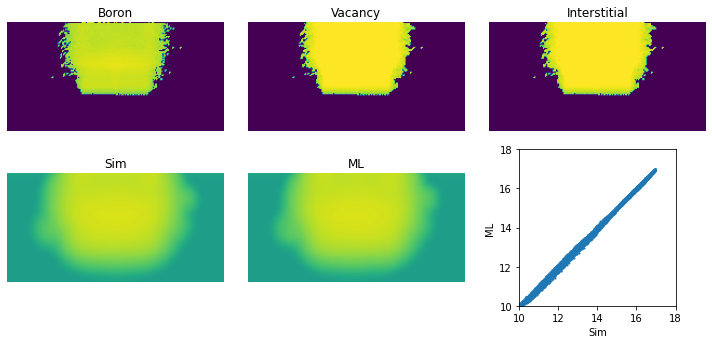

70
temperature:976.0℃, time:8098.0s
r2:0.998973


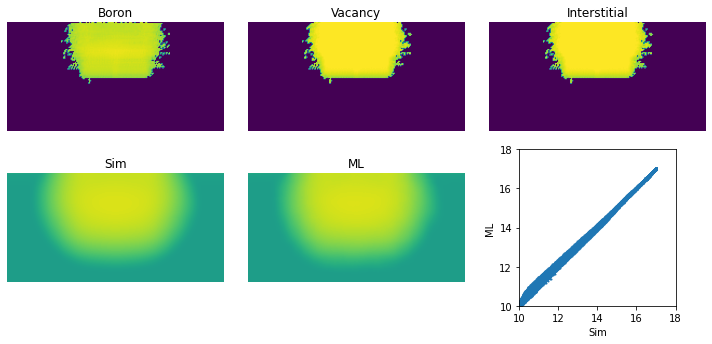

71
temperature:1059.0℃, time:8018.0s
r2:0.989245


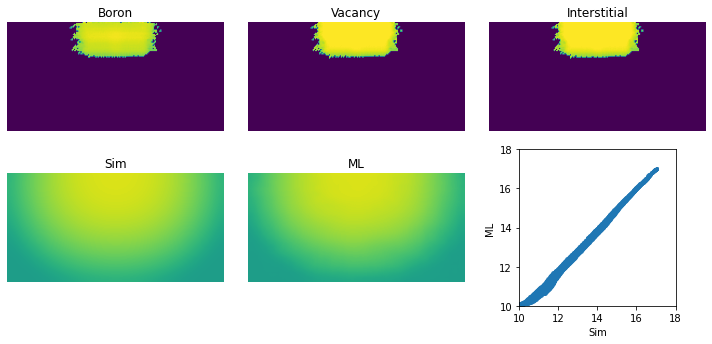

72
temperature:1149.0℃, time:8973.0s
r2:0.993379


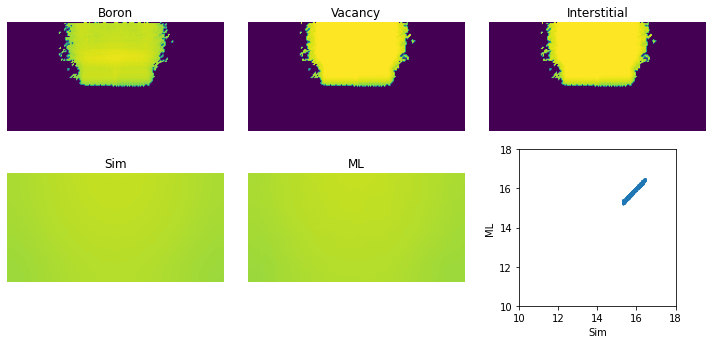

73
temperature:843.0℃, time:6498.0s
r2:0.998338


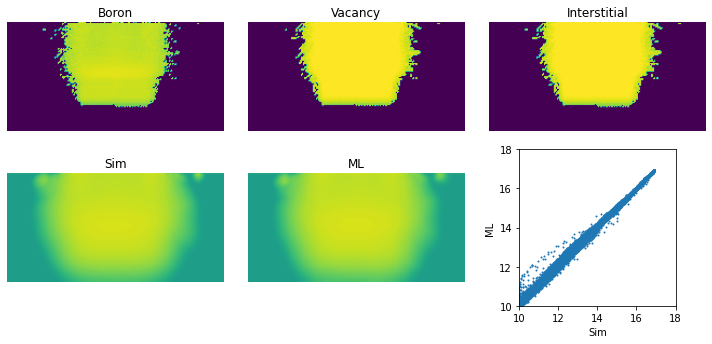

74
temperature:1032.0℃, time:3645.0s
r2:0.999031


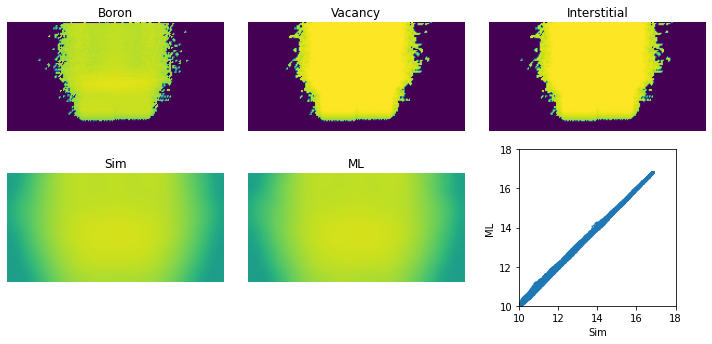

75
temperature:877.0℃, time:3973.0s
r2:0.999112


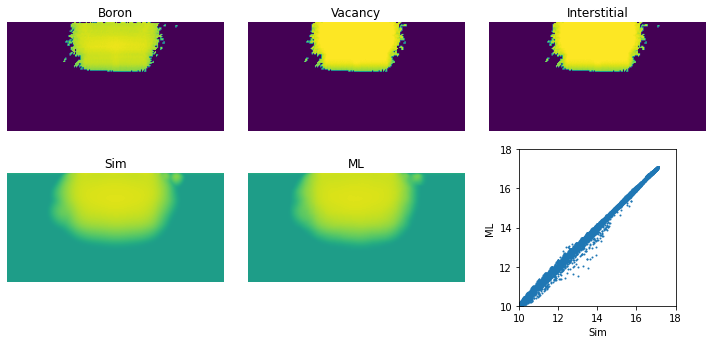

76
temperature:844.0℃, time:3716.0s
r2:0.998736


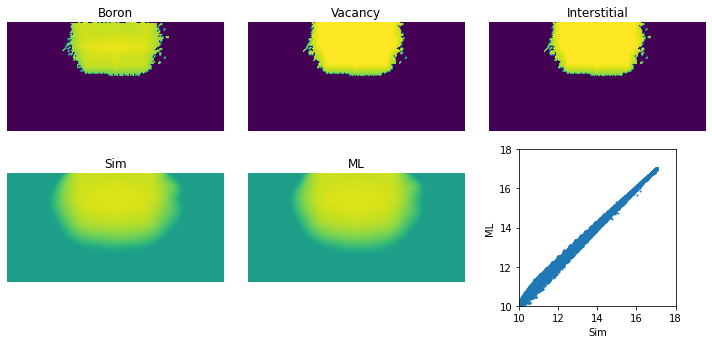

77
temperature:756.0℃, time:10021.0s
r2:0.992880


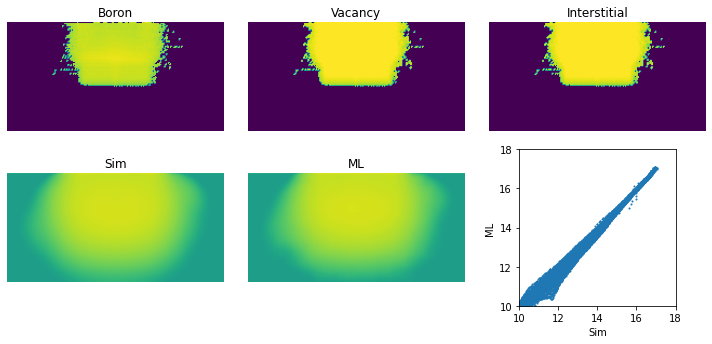

78
temperature:910.0℃, time:7801.0s
r2:0.999845


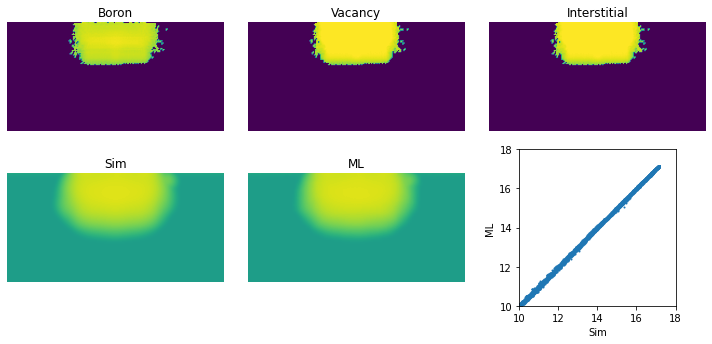

79
temperature:709.0℃, time:7102.0s
r2:0.992702


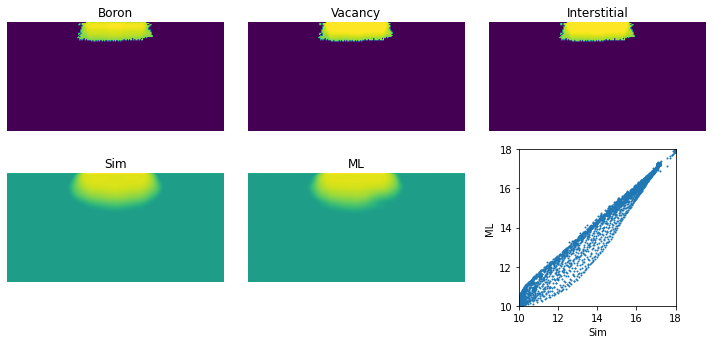

80
temperature:907.0℃, time:10682.0s
r2:0.999552


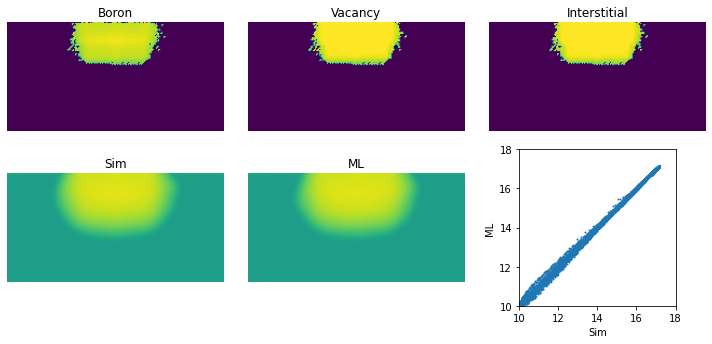

81
temperature:1160.0℃, time:726.0s
r2:0.996814


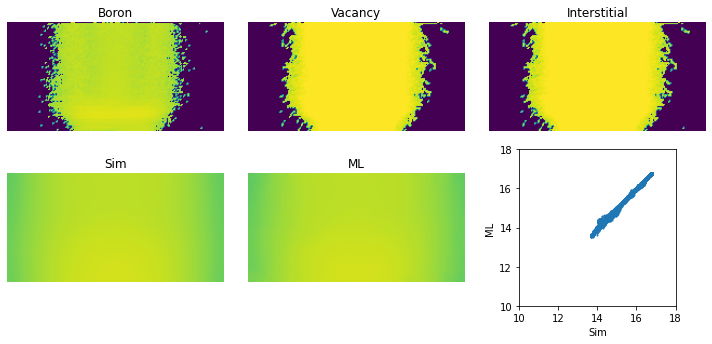

82
temperature:1095.0℃, time:1477.0s
r2:0.999276


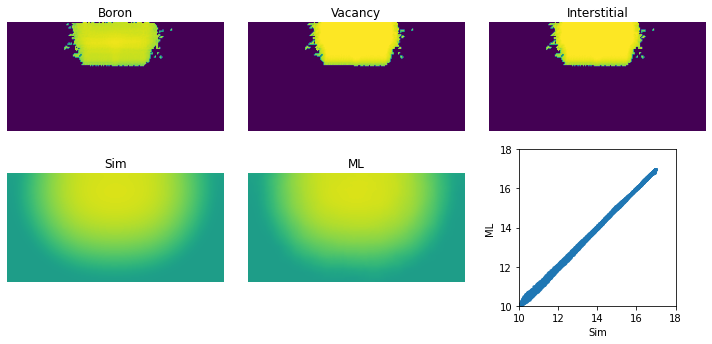

83
temperature:946.0℃, time:4923.0s
r2:0.999357


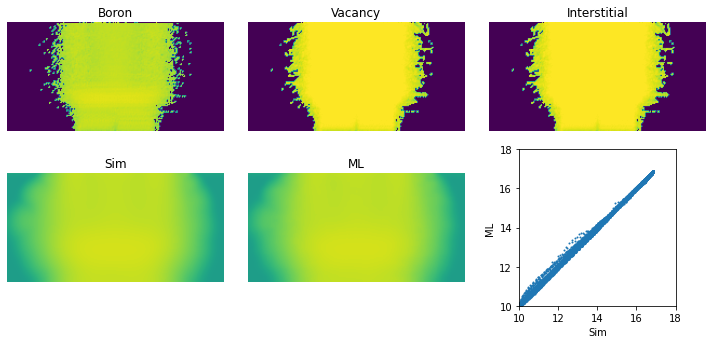

84
temperature:768.0℃, time:4488.0s
r2:0.997994


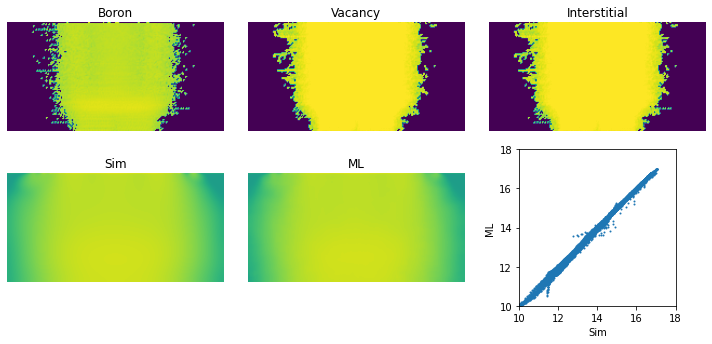

85
temperature:745.0℃, time:10077.0s
r2:0.993381


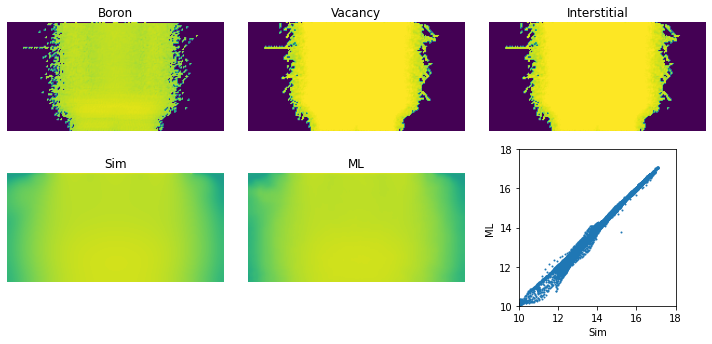

86
temperature:732.0℃, time:5421.0s
r2:0.995679


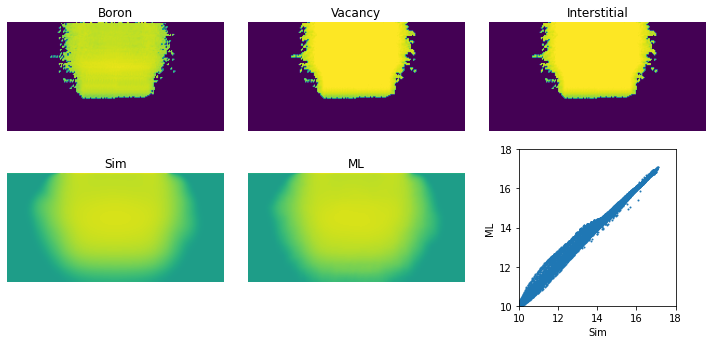

87
temperature:815.0℃, time:8651.0s
r2:0.997791


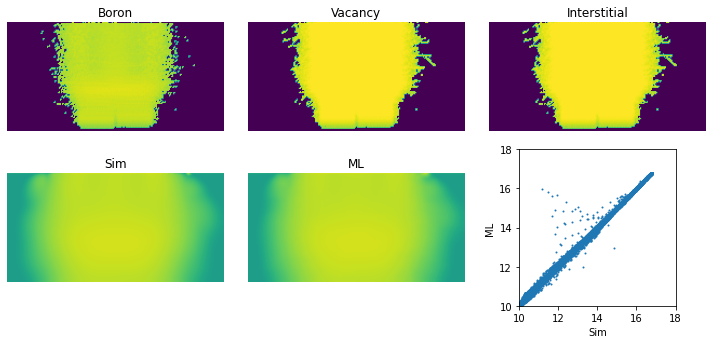

88
temperature:983.0℃, time:9094.0s
r2:0.998241


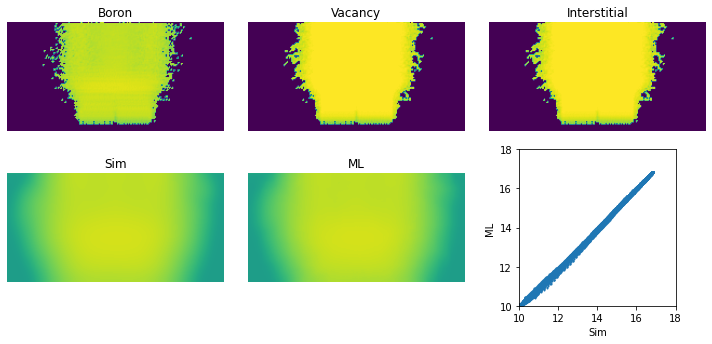

89
temperature:940.0℃, time:7150.0s
r2:0.998767


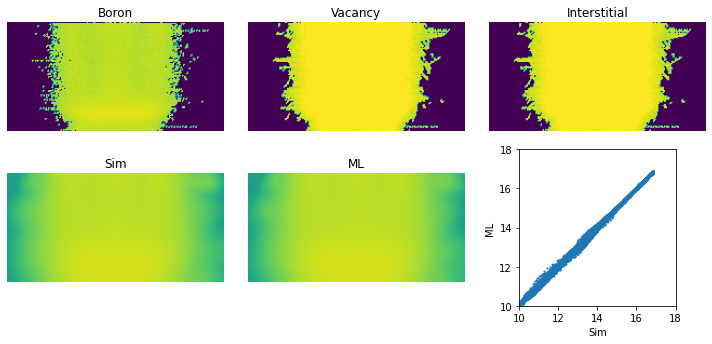

90
temperature:1145.0℃, time:780.0s
r2:0.996434


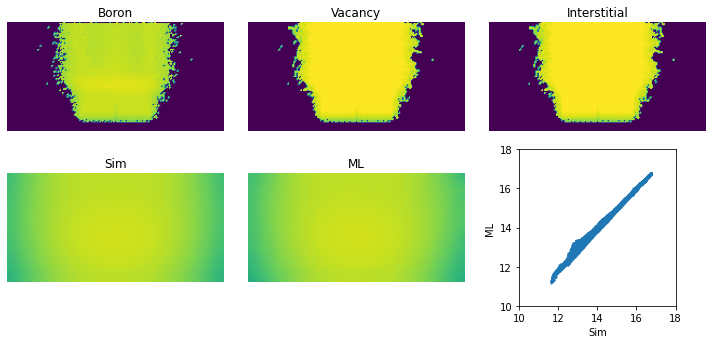

91
temperature:1198.0℃, time:6682.0s
r2:0.784598


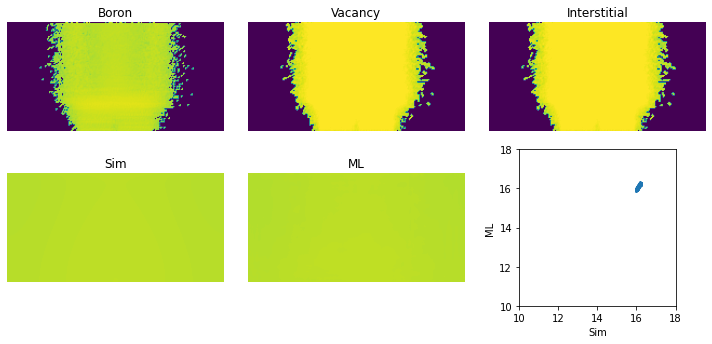

92
temperature:728.0℃, time:9003.0s
r2:0.999209


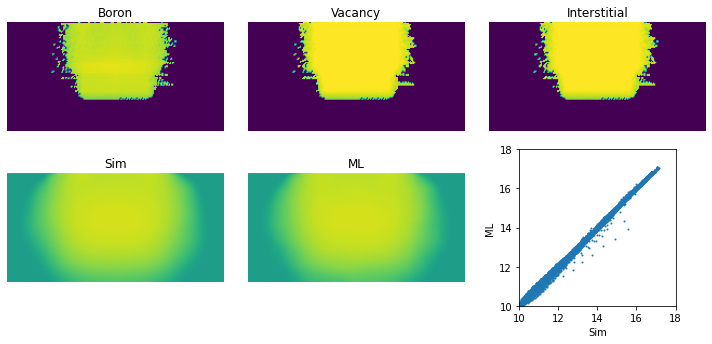

93
temperature:937.0℃, time:2521.0s
r2:0.999116


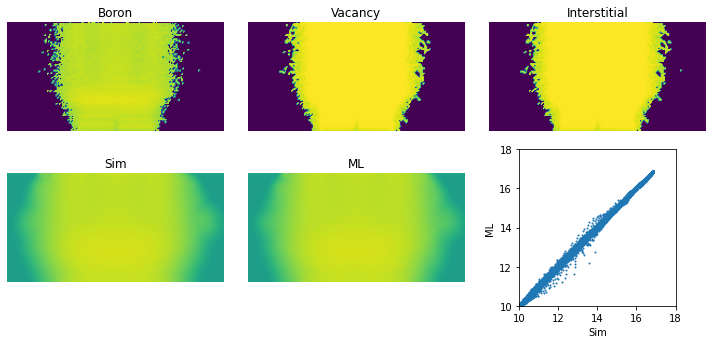

94
temperature:1081.0℃, time:2634.0s
r2:0.997392


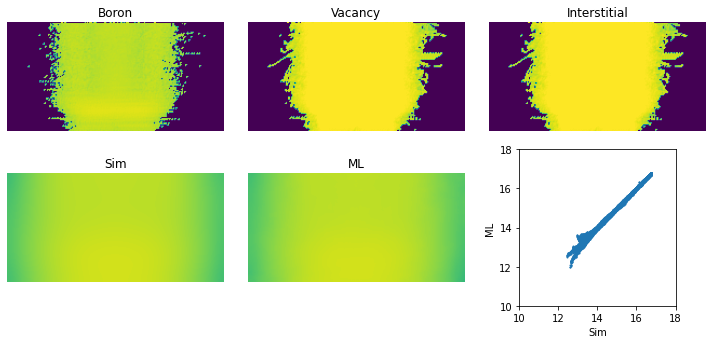

95
temperature:937.0℃, time:6277.0s
r2:0.999568


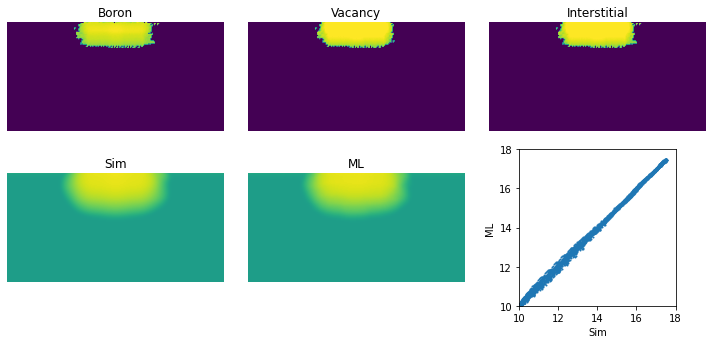

96
temperature:742.0℃, time:3964.0s
r2:0.998328


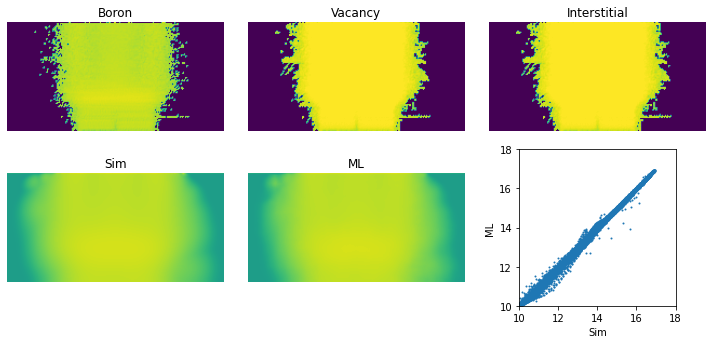

97
temperature:1009.0℃, time:5790.0s
r2:0.999703


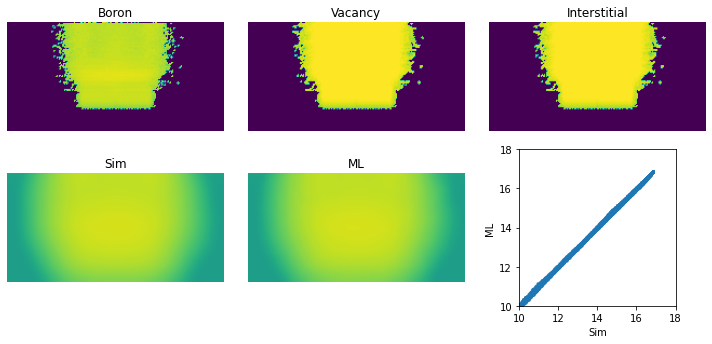

98
temperature:915.0℃, time:2882.0s
r2:0.999720


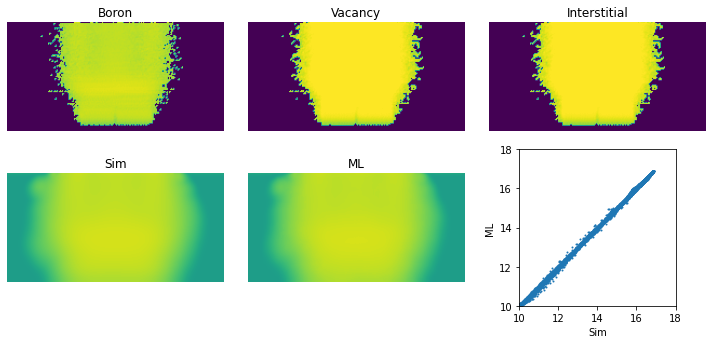

99
temperature:1018.0℃, time:3723.0s
r2:0.999652


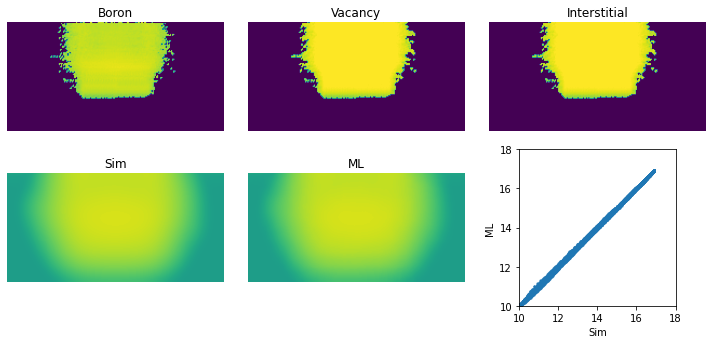

In [13]:
for i in range(0, 100):
    fig, axes=plt.subplots(2, 3, figsize=(10, 5))
    axes[0, 0].imshow(UNET.twoD_x_test[i, 0, :, :], vmin=0, vmax=18)
    axes[0, 0].set_title("Boron")
    axes[0, 0].axis("off")
    axes[0, 1].imshow(UNET.twoD_x_test[i, 1, :, :], vmin=0, vmax=18)
    axes[0, 1].set_title("Vacancy")
    axes[0, 1].axis("off")
    axes[0, 2].imshow(UNET.twoD_x_test[i, 2, :, :], vmin=0, vmax=18)
    axes[0, 2].set_title("Interstitial")
    axes[0, 2].axis("off")
    

    axes[1, 0].imshow(numpy_val_truth[i, 0, :, :], vmin=0, vmax=18)
    axes[1, 0].set_title("Sim")
    axes[1, 0].axis("off")
    axes[1, 1].imshow(numpy_val_pred[i, 0, :, :], vmin=0, vmax=18)
    axes[1, 1].set_title("ML")
    axes[1, 1].axis("off")
    score = r2_score(numpy_val_truth[i, 0, :, :].flatten(), numpy_val_pred[i, 0, :, :].flatten())
    axes[1, 2].scatter(numpy_val_truth[i, 0, :, :].flatten(), numpy_val_pred[i, 0, :, :].flatten(), s=1)
    axes[1, 2].set_xlim(10, 18)
    axes[1, 2].set_ylim(10, 18)
    axes[1, 2].set_aspect('equal', adjustable='box')
    axes[1, 2].set_xlabel("Sim")
    axes[1, 2].set_ylabel("ML")
    fig.tight_layout()
    print(i)
    print(f"temperature:{UNET.oneD_x_test_tensor[i][0]}℃, time:{UNET.oneD_x_test_tensor[i][1]}s")
    print("r2:{:2f}".format(score))
    plt.show()

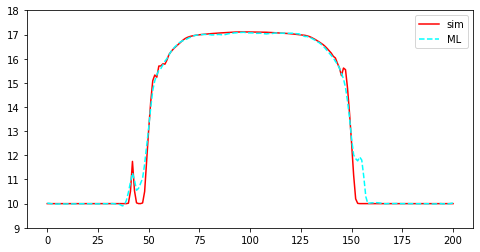

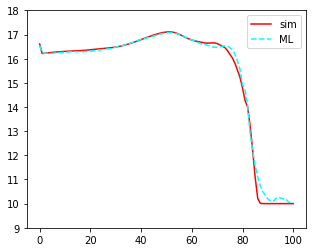

In [37]:
from visualize import horizontal_plot, vertical_plot

n = 35
horizontal_plot(n=n, y=50, sim=UNET.y_test, pred=test_pred, low=9, up=18)
vertical_plot(n=n, x=100, sim=UNET.y_test, pred=test_pred, low=9, up=18)

Text(0.5, 1.0, 'ML')

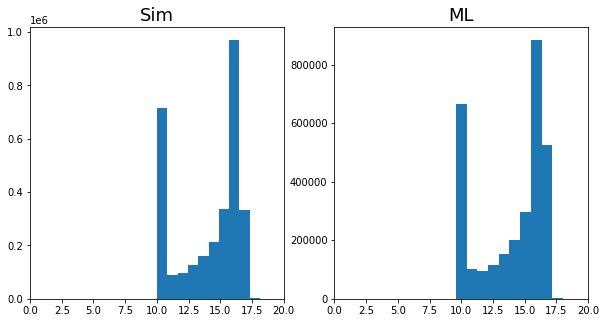

In [39]:
#分布比較
fig, axes=plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(numpy_val_truth.flatten())
# axes[0].set_ylim(0, 37000)
axes[0].set_xlim(0, 20)
axes[0].set_title("Sim", fontsize=18)
axes[1].hist(numpy_val_pred.flatten())
# axes[1].set_ylim(0, 37000)
axes[1].set_xlim(0, 20)
axes[1].set_title("ML", fontsize=18)

# print("Sim", len(numpy_val_truth[numpy_val_truth<1e10]), numpy_val_truth.min())
# print("ML", len(numpy_val_pred[numpy_val_pred<1e10]), numpy_val_pred.min())

In [40]:
def mape(pred, target):
    return (np.abs((pred-target)) / target).mean()

mape(pred=scaler_ml.former_data, target=scaler_sim.former_data)

0.34538735486563993

In [41]:
def mae(pred, target):
    return np.abs(pred-target).mean()

mae_loss = mae(pred=scaler_ml.former_data, target=scaler_sim.former_data)
print(f"{mae_loss:e}")

5.438112e+14
